## **Intro mxnet NDArray**
* 목표 : mxnet의 NDArray 실습해보기
* 출처 : https://mxnet.incubator.apache.org/tutorials/basic/ndarray.html

* NDArray : the core data structure for all mathematical computations.
  * similar to numpy.ndarray
* key advantages
  * fast execution on a wide range of hardware configurations, including CPU, GPU, and multi-GPU machines
  * distributed systems in the cloud.
  * automatically parallelize multiple operations across the available hardware.
  * provide support for automatic differentiation
* some important attributes
  * ndarray.**shape**: The dimensions of the array.
  * ndarray.**dtype**: A numpy type object describing the type of its elements.
  * ndarray.**size**: The total number of components in the array - equal to the product of the components of its shape
  * ndarray.**context**: The device on which this array is stored, e.g. cpu() or gpu(1).

#### create an NDArray.

In [1]:
import mxnet as mx
from mxnet import nd
# create a 1-dimensional array with a python list
a = nd.array([1,2,3])
# create a 2-dimensional array with a nested python list
b = nd.array([[1,2,3], [2,3,4]])
{'a.shape':a.shape, 'b.shape':b.shape}

{'a.shape': (3,), 'b.shape': (2, 3)}

In [2]:
print('a:',a)
print('b:',b)

a: 
[ 1.  2.  3.]
<NDArray 3 @cpu(0)>
b: 
[[ 1.  2.  3.]
 [ 2.  3.  4.]]
<NDArray 2x3 @cpu(0)>


In [3]:
# create an MXNet NDArray from a numpy.ndarray object
import numpy as np
import math
c = np.arange(15).reshape(3,5)
# create a 2-dimensional array from a numpy.ndarray object
a = nd.array(c) # numpy -> MXNet
{'a.shape':a.shape}

{'a.shape': (3, 5)}

In [4]:
#MXNet -> numpy
a.asnumpy() 

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.]], dtype=float32)

In [5]:
# Printing Arrays
b = nd.arange(18).reshape((3,2,3))
b.asnumpy()

array([[[  0.,   1.,   2.],
        [  3.,   4.,   5.]],

       [[  6.,   7.,   8.],
        [  9.,  10.,  11.]],

       [[ 12.,  13.,  14.],
        [ 15.,  16.,  17.]]], dtype=float32)

In [6]:
#동일한 결과
np.arange(18).reshape((3,2,3))

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]]])

#### Basic Operations

In [7]:
a = nd.ones((2,3))
b = nd.ones((2,3))
print('a:',a)

a: 
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @cpu(0)>


In [8]:
# elementwise plus
c = a + b
print('c:',c)

c: 
[[ 2.  2.  2.]
 [ 2.  2.  2.]]
<NDArray 2x3 @cpu(0)>


In [9]:
# elementwise minus
d = - c
print('d:',d)

d: 
[[-2. -2. -2.]
 [-2. -2. -2.]]
<NDArray 2x3 @cpu(0)>


In [10]:
# elementwise pow and sin, and then transpose
e = nd.sin(c**2).T
print('e:',e)

e: 
[[-0.7568025 -0.7568025]
 [-0.7568025 -0.7568025]
 [-0.7568025 -0.7568025]]
<NDArray 3x2 @cpu(0)>


In [11]:
# elementwise max
f = nd.maximum(a, c)
f.asnumpy()

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.]], dtype=float32)

In [12]:
#matrix-matrix multiplication
a = nd.arange(4).reshape((2,2))
b = a * a
c = nd.dot(a,a) 
print("a: %s, \nb: %s, \n c: %s" % (a.asnumpy(),b.asnumpy(), c.asnumpy()))

a: [[ 0.  1.]
 [ 2.  3.]], 
b: [[ 0.  1.]
 [ 4.  9.]], 
 c: [[  2.   3.]
 [  6.  11.]]


In [15]:
# don’t allocate new memory to create a new array
a = nd.ones((2,2))
b += a
b.asnumpy()

array([[ 3.,  3.],
       [ 3.,  3.]], dtype=float32)

In [16]:
print('id(a):',id(a))
print('id(b):',id(b))

id(a): 4562399528
id(b): 4562400592


#### Indexing and Slicing

In [17]:
a = nd.array(np.arange(6).reshape(3,2))
a[1:2] = 1 #2nd row에 1 입력
a[:].asnumpy()

array([[ 0.,  1.],
       [ 1.,  1.],
       [ 4.,  5.]], dtype=float32)

In [18]:
#slice a particular axis
d = nd.slice_axis(a, axis=1, begin=1, end=2) #2nd column
d.asnumpy()

array([[ 1.],
       [ 1.],
       [ 5.]], dtype=float32)

#### Shape Manipulation

In [19]:
#concat : stacks multiple arrays along the first axis. Their shapes must be the same along the other axes.
a = nd.ones((2,3))
b = nd.ones((2,3))*2
c = nd.concat(a,b) 
c.asnumpy()

array([[ 1.,  1.,  1.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  2.,  2.,  2.]], dtype=float32)

#### Reduce

In [19]:
a = nd.ones((2,3))
b = nd.sum(a)
b.asnumpy()

array([ 6.], dtype=float32)

In [20]:
nd.sum_axis(c, axis=1) #axis=1's sum


[ 9.  9.]
<NDArray 2 @cpu(0)>

In [21]:
nd.sum_axis(c, axis=0) #axis=0's sum


[ 2.  2.  2.  4.  4.  4.]
<NDArray 6 @cpu(0)>

#### broadcast

In [22]:
a = nd.array(np.arange(6).reshape(6,1))
b = a.broadcast_to((6,4))  #a -> 4번 반복
b.asnumpy()

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.]], dtype=float32)

In [23]:
a


[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]]
<NDArray 6x1 @cpu(0)>

In [24]:
a = nd.ones((3,2))
b = nd.ones((1,2))
c = a + b
c.asnumpy()

array([[ 2.,  2.],
       [ 2.,  2.],
       [ 2.,  2.]], dtype=float32)

In [25]:
a


[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
<NDArray 3x2 @cpu(0)>

In [26]:
b


[[ 1.  1.]]
<NDArray 1x2 @cpu(0)>

#### Copies

In [27]:
a = nd.ones((2,2))
b = a
b is a # will be True

True

In [28]:
b = a.copy()
b is a  # will be False

False

In [29]:
#we do not want to allocate additional memory, we can use the copyto method or the slice operator [] instead.
b = nd.ones(a.shape)
c = b
c[:] = a
d = b
a.copyto(d)
(c is b, d is b)  # Both will be True

(True, True)

### Advanced Topics
* GPU Support : 추후에 해보기

In [30]:
gpu_device=mx.gpu() # Change this to mx.cpu() in absence of GPUs.

In [31]:
def f():
    a = mx.nd.ones((100,100))
    b = mx.nd.ones((100,100))
    c = a + b
    print(c)
# in default mx.cpu() is used
f()


[[ 2.  2.  2. ...,  2.  2.  2.]
 [ 2.  2.  2. ...,  2.  2.  2.]
 [ 2.  2.  2. ...,  2.  2.  2.]
 ..., 
 [ 2.  2.  2. ...,  2.  2.  2.]
 [ 2.  2.  2. ...,  2.  2.  2.]
 [ 2.  2.  2. ...,  2.  2.  2.]]
<NDArray 100x100 @cpu(0)>


In [32]:
# change the default context to the first GPU
with mx.Context(gpu_device):
    f()

MXNetError: [16:30:42] src/imperative/imperative.cc:78: Operator _ones is not implemented for GPU.

Stack trace returned 6 entries:
[bt] (0) 0   libmxnet.so                         0x0000000103b03b98 _ZN4dmlc15LogMessageFatalD2Ev + 40
[bt] (1) 1   libmxnet.so                         0x0000000104a79cd4 _ZN5mxnet10Imperative8InvokeOpERKNS_7ContextERKN4nnvm9NodeAttrsERKNSt3__16vectorIPNS_7NDArrayENS8_9allocatorISB_EEEESG_RKNS9_INS_9OpReqTypeENSC_ISH_EEEENS_12DispatchModeENS_10OpStatePtrE + 1972
[bt] (2) 2   libmxnet.so                         0x0000000104a7d8da _ZN5mxnet10Imperative6InvokeERKNS_7ContextERKN4nnvm9NodeAttrsERKNSt3__16vectorIPNS_7NDArrayENS8_9allocatorISB_EEEESG_ + 794
[bt] (3) 3   libmxnet.so                         0x00000001049fe667 _Z22MXImperativeInvokeImplPviPS_PiPS0_iPPKcS5_ + 391
[bt] (4) 4   libmxnet.so                         0x00000001049ff834 MXImperativeInvokeEx + 164
[bt] (5) 5   _ctypes.cpython-36m-darwin.so       0x0000000102bed2c7 ffi_call_unix64 + 79


#### Serialize From/To (Distributed) Filesystems

In [33]:
# MXNet offers two simple ways to save (load) data to (from) disk.
#1) first way is to use pickle
import pickle as pkl
a = nd.ones((2, 3))
# pack and then dump into disk
data = pkl.dumps(a)
pkl.dump(data, open('tmp.pickle', 'wb'))
# load from disk and then unpack
data = pkl.load(open('tmp.pickle', 'rb'))
b = pkl.loads(data)
b.asnumpy()

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

In [34]:
#2) The second way is to directly dump to disk in binary format by using the save and load methods
a = nd.ones((2,3))
b = nd.ones((5,6))
nd.save("temp.ndarray", [a,b])
c = nd.load("temp.ndarray")
c

[
 [[ 1.  1.  1.]
  [ 1.  1.  1.]]
 <NDArray 2x3 @cpu(0)>, 
 [[ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]
 <NDArray 5x6 @cpu(0)>]

In [35]:
#load and save
a = nd.ones((2, 3))
nd.save("temp.ndarray", [a,])

#we can load it from R: 
#a <- mx.nd.load("temp.ndarray")
#as.array(a[[1]])

### Automatic differentiation with autograd
* mxnet.autograd : allows you to take derivatives while writing ordinary imperative code (like PyTorch)

In [54]:
import mxnet as mx
from mxnet import nd, autograd
from IPython.display import display, Math, Latex
mx.random.seed(1)

#### Attaching gradients

In [55]:
display(Math(r'f = 2 x^2'))

<IPython.core.display.Math object>

In [56]:
#assigning an initial value of x
x = nd.array([[1, 2], [3, 4]])
x


[[ 1.  2.]
 [ 3.  4.]]
<NDArray 2x2 @cpu(0)>

In [57]:
x.attach_grad()

In [58]:
with autograd.record():
    y = x * 2
    z = y * x

In [59]:
z.backward() #equivalent to mx.nd.sum(z).backward().

In [63]:
display(Math(r'y = 2x'))
display(Math(r'z = yx = 2xx=2x^2'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [61]:
display(Math(r'dy/dx = 2, dz/dx = 4x'))

<IPython.core.display.Math object>

In [62]:
print(x.grad)


[[  4.   8.]
 [ 12.  16.]]
<NDArray 2x2 @cpu(0)>


## **Symbol - Neural network graphs and auto-differentiation**

* MXNet provides the Symbol API, an interface for symbolic programming.
* MXNet’s Symbol API is similar to the network configurations used by **Caffe** and the symbolic programming in **Theano.**
* symbolic approach : we can optimize our functions before using them.

### Basic Symbol Composition


#### Basic Operators

In [36]:
import mxnet as mx
from mxnet import nd,sym,viz
a = sym.Variable('a')
b = sym.Variable('b')
c = a + b # c is assigned a unique name automatically.
(a, b, c)

(<Symbol a>, <Symbol b>, <Symbol _plus0>)

#### Basic Neural Networks

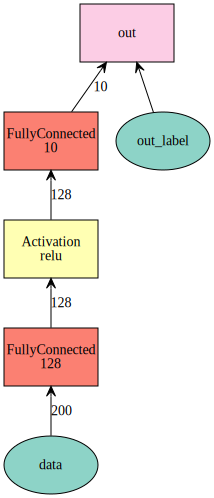

In [37]:
#a two layer fully connected neural network
#(error 발생시, 'brew install graphviz' 실행)
net = sym.Variable('data')
net = sym.FullyConnected(data=net, name='fc1', num_hidden=128)
net = sym.Activation(data=net, name='relu1', act_type="relu")
net = sym.FullyConnected(data=net, name='fc2', num_hidden=10)
net = sym.SoftmaxOutput(data=net, name='out')
viz.plot_network(net, shape={'data':(100,200)})

In [38]:
net.list_arguments()

['data', 'fc1_weight', 'fc1_bias', 'fc2_weight', 'fc2_bias', 'out_label']

* parameters and inputs needed by each symbol:
  * data: Input data needed by the variable data.
  * fc1_weight and fc1_bias: The weight and bias for the first fully connected layer fc1.
  * fc2_weight and fc2_bias: The weight and bias for the second fully connected layer fc2.
  * out_label: The label needed by the loss.

In [39]:
# FullyConnected layer has 3 inputs: data, weight, bias. 
net = sym.Variable('data')
w = sym.Variable('myweight')
net = sym.FullyConnected(data=net, weight=w, name='fc1', num_hidden=128)
net.list_arguments()

['data', 'myweight', 'fc1_bias']

### More Complicated Composition

In [48]:
# first performs an element-wise add between two symbols, then feeds them to the fully connected operator:
lhs = sym.Variable('data1')
rhs = sym.Variable('data2')
net = sym.FullyConnected(data=lhs + rhs, name='fc1', num_hidden=128)
net.list_arguments()

['data1', 'data2', 'fc1_weight', 'fc1_bias']

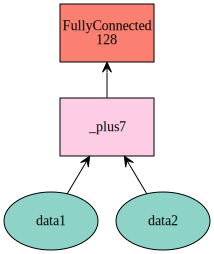

In [49]:
viz.plot_network(net)

#### Modularized Construction for Deep Networks

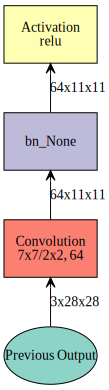

In [50]:
def ConvFactory(data, num_filter, kernel, stride=(1,1), pad=(0, 0),name=None, suffix=''):
    conv = mx.sym.Convolution(data=data, num_filter=num_filter, kernel=kernel,
                  stride=stride, pad=pad, name='conv_%s%s' %(name, suffix))
    bn = mx.sym.BatchNorm(data=conv, name='bn_%s%s' %(name, suffix))
    act = mx.sym.Activation(data=bn, act_type='relu', name='relu_%s%s'
                  %(name, suffix))
    return act
prev = mx.sym.Variable(name="Previous Output")
conv_comp = ConvFactory(data=prev, num_filter=64, kernel=(7,7), stride=(2, 2))
shape = {"Previous Output" : (128, 3, 28, 28)}
mx.viz.plot_network(symbol=conv_comp, shape=shape)